In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
style.use('ggplot')
%matplotlib inline
import numpy as np

In [30]:
data = pkl.load(open('data/output/Multi_eval.pkl', "rb"))

In [31]:
data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']

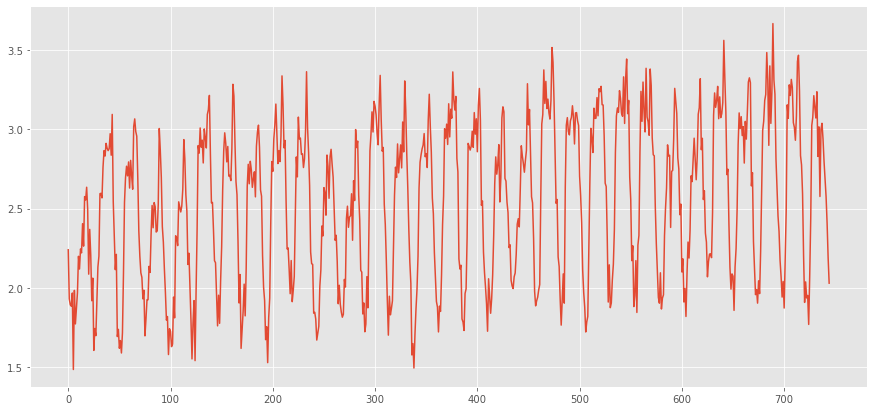

In [4]:
f, ax = plt.subplots(figsize=(15,7))
data['Base Loads'].plot()

In [32]:
data['above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)

In [33]:
sum(data['above'])

247.0495775321029

In [34]:
data['above'].mean()

0.3316101711840308

In [35]:
data['Rewards'].sum()

-1461.92553532819

In [36]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [40]:
one_week = data.iloc[:,:]

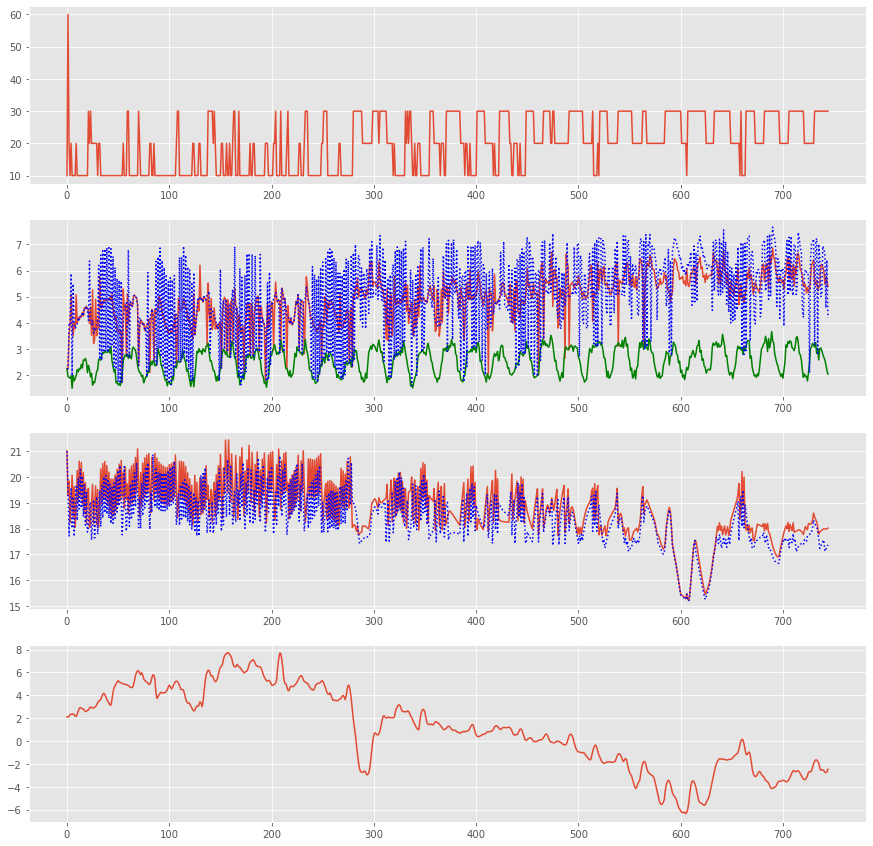

In [41]:
f, ax = plt.subplots(4,1,figsize=(15,15))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Total Load'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
one_week['Base Loads'].plot(ax=ax[1],c='g')
data_base.iloc[:,:]['Total Load'].plot(ax=ax[1],c='b', linestyle = 'dotted')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='b', linestyle = 'dotted')
one_week['Ambient Temperatures'].plot(ax=ax[3])

In [42]:
sum(data['Total Load'] >= 5)

382

In [43]:
data_base = pkl.load(open('data/output/Multibase_eval.pkl', "rb"))

In [44]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['above'] = (data_base['Total Load'] >= 5)*(data_base['Total Load']-5)

In [45]:
data_base['Rewards'].sum()

-1170.1273836870714

In [46]:
sum(data_base['above'])

494.41243006121783

In [47]:
data_base['above'].mean()

0.6636408457197552

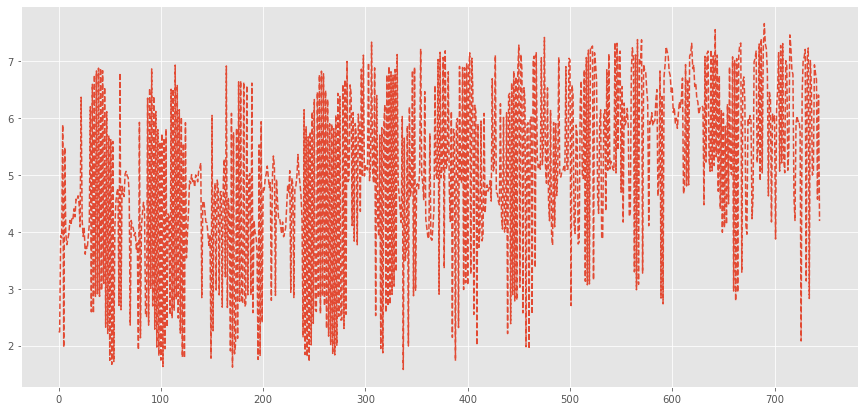

In [135]:
f, ax = plt.subplots(figsize=(15,7))
data_base['Total Load'].plot(ax=ax, linestyle='--')

In [136]:
sum(data_base['Total Load'] >= 5)

385

In [51]:
data = pkl.load(open('data/output/8943263_dynamic_True_rewards_dqn.pkl', "rb"))

In [52]:
data[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 5,
 'LOAD_PENALTY': 1000,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0.2}

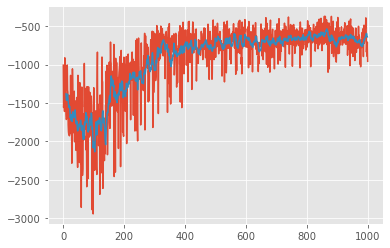

In [53]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

In [18]:
data_rms = pkl.load(open('data/output/8667145_dynamic_True_rewards_dqn.pkl', "rb"))

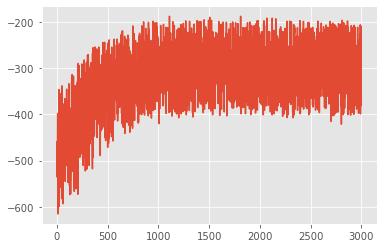

In [19]:
plt.figure()
plt.plot(data_rms[:-1])

In [2]:
data_LP = pkl.load(open('data/output/Multi_LP_eval.pkl', "rb"))

In [3]:
data_LP['Total Load'] = data_LP['Total Load']*1000

In [4]:
sum((data_LP['Total Load'] >= 6.6)*1)

260

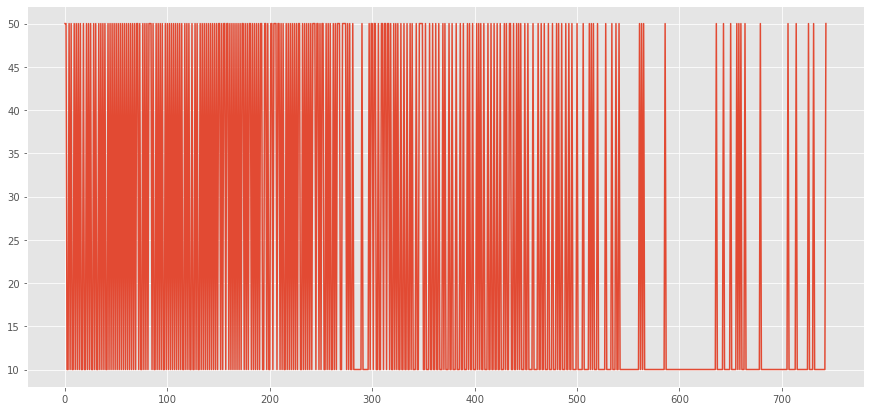

In [7]:
f, ax = plt.subplots(figsize=(15,7))
data_LP['Prices'].plot()

# MADDPG

In [8]:
rewards = pkl.load(open('data/output/MADDPG/9212421_rewards_maddpg.pkl', "rb"))

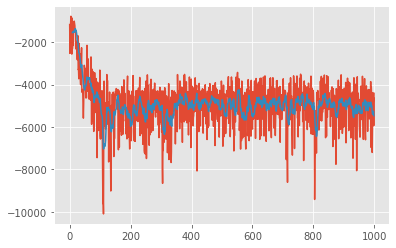

In [9]:
plt.figure()
plt.plot(rewards[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)